<a href="https://colab.research.google.com/github/AnnaBujniewicz/semester_project/blob/main/bibliometrics_record_collections_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/mclevey/metaknowledge_article_supplement/blob/master/1_record_collections.ipynb

In [ ]:
#Installing the necessary packages
!python -m spacy download en_core_web_sm
!pip install metaknowledge
!pip install -qq holoviews
!pip install -qq -U bokeh
!pip install -qq datashader
!pip install -qq pyLDAvis

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 163kB 11.0MB/s 
     |████████████████████████████████| 8.9MB 11.6MB/s 
     |████████████████████████████████| 2.2MB 52.0MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 15.5MB 219kB/s 
     |████████████████████████████████| 81kB 12.4MB/s 
     |████████████████████████████████| 1.6MB 44.7MB/s 
     |████████████████████████████████| 102kB 14.8MB/s 
     |████████████████████████████████| 675kB 48.4MB/s 
     |████████████████████████████████| 102kB 14.1MB/s 
ERROR: distributed 2020.12.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2020.12.0 has requirement dask>=2020.12.0, but you'll have dask 2.12.0 which is incompatible.
     |████████████████████████████████| 1.6M

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
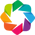

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


<Figure size 720x720 with 0 Axes>

In [ ]:
#Importing the needed libraries
#Changing some settings
#Downloading some lists
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from spacy.matcher import PhraseMatcher
import networkx as nx
import community as community_louvain
from collections import Counter
sns.set(rc={'figure.figsize':(15,15)})
plt.figure(figsize=(10,10))
import warnings
warnings.filterwarnings('ignore')
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))
from holoviews.operation.datashader import datashade, bundle_graph
from collections import Counter
import itertools
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from string import punctuation
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
from gensim.similarities import MatrixSimilarity
import umap
import metaknowledge as mk

In [ ]:
#Using it as one of the commands we are using for iteration is giving a warning about being discontinued in the future
warnings.filterwarnings('ignore')

In [ ]:
#dff=pd.read_csv('https://raw.githubusercontent.com/ztakac18/M2-data/main/lit-review.csv')

In [ ]:
#Load the file
#Read the data in using the scopus functionality (it allows for a more readable split of the columns)
#It creates a list instead of a dataframe; converting it to a dataframe
scopus = mk.scopus.scopusHandlers.scopusParser("/content/lit-review.csv")
sc= scopus[0]
RC = mk.RecordCollection(sc)
df = pd.DataFrame(RC.makeDict())

# Inspecting data

In [ ]:
df.head()

EID  Source Open Access  ... num-Male num-Female num-Unknown
0  2-s2.0-85091867411  Scopus        None  ...        0          0           2
1  2-s2.0-85078534560  Scopus        None  ...        0          0           2
2  2-s2.0-85030858512  Scopus        None  ...        0          0           6
3  2-s2.0-85090528875  Scopus        None  ...        0          0           4
4  2-s2.0-84978153356  Scopus        None  ...        0          0           3

[5 rows x 46 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EID                            92 non-null     object 
 1   Source                         92 non-null     object 
 2   Open Access                    0 non-null      object 
 3   Publication Stage              0 non-null      object 
 4   Document Type                  92 non-null     object 
 5   Abbreviated Source Title       92 non-null     object 
 6   Language of Original Document  92 non-null     object 
 7   ISSN                           54 non-null     object 
 8   Publisher                      85 non-null     object 
 9   References                     89 non-null     object 
 10  Author Keywords                83 non-null     object 
 11  Abstract                       92 non-null     object 
 12  Authors with affiliations      92 non-null     objec


Creating and Processing Record Collections

In [ ]:
len(RC)

93

In [ ]:
#RC1314 = RC.yearSplit(2017, 2018)
#gender_breakdown = RC1314.genderStats()
#gender_breakdown

In [ ]:
print(RC.glimpse())

RecordCollection glimpse made at: 2020-12-31 12:13:40
93 Records from 

Top Authors
1 [No author name available]
1 Zhang J.
2 Rikumahu B.
2 Kumari S.
2 Bogle S.A.
2 Potter W.D.
2 Banik S.
2 Anwer M.
2 Liu Y.

Top Journals
1 Advances in Intelligent Systems and Computing
2 Lecture Notes in Computer Science (including subseries Lecture Notes in Artifi
3 ACM International Conference Proceeding Series
4 Communications in Computer and Information Science
4 Lecture Notes on Data Engineering and Communications Technologies
5 International Journal of Emerging Trends in Engineering Research
5 Proceedings - International Conference on Machine Learning and Cybernetics
5 2019 7th International Conference on Information and Communication Technology,
5 Journal of Physics: Conference Series

Top Cited
1 Bollen, J., Mao, H., Zeng, X., Twitter mood predicts the stock market (2011) J
1 Patel, J., Shah, S., Thakkar, P., Kotecha, K., Predicting stock and stock pric
1 Patel, J., Predicting stock and stock p

In [ ]:
import metaknowledge as mk
import pandas

# for static graphs 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
get_ipython().magic("config InlineBackend.figure_format = 'retina'")

sns.set_style(style="white") # change the default background plot colour
sns.set(font_scale=.75)
plt.rc("savefig", dpi=400) # improve default resolution of graphics

# for interactive graphs 
import plotly as py
import plotly.graph_objs as go

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 6.8MB/s 


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go

# Document Type 

In [ ]:
#Inspecting the "Document Type" 
Counter(df['Document Type'])

Counter({'Article': 24,
         'Book Chapter': 4,
         'Conference Paper': 61,
         'Conference Review': 3,
         None: 1})

In [ ]:
df.head(2)

EID  Source Open Access  ... num-Male num-Female num-Unknown
0  2-s2.0-85091867411  Scopus        None  ...        0          0           2
1  2-s2.0-85078534560  Scopus        None  ...        0          0           2

[2 rows x 46 columns]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Prepare data for visualization 
document_type = df.groupby('Document Type').agg('count')
document_labels = document_type.Authors.sort_values().index
document_counts = document_type.Authors.sort_values()

<BarContainer object of 4 artists>

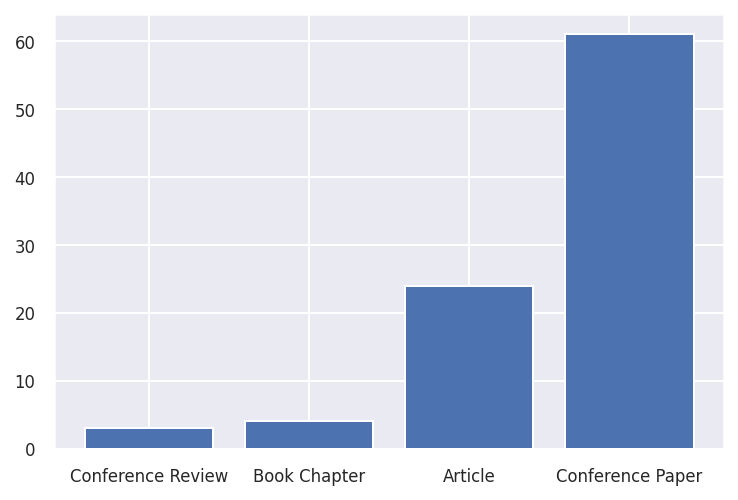

In [ ]:
plt.bar(document_type.Authors.sort_values().index, document_type.Authors.sort_values())

In [ ]:
fig = go.Figure([go.Bar(x=df["Document Type"], y=df.groupby('Document Type').agg('count'))])
fig.show()

In [ ]:
#Prepare data for visualization 
document_type = df.groupby('Document Type').agg('count')
document_labels = document_type.Authors.sort_values().index
document_counts = document_type.Authors.sort_values()

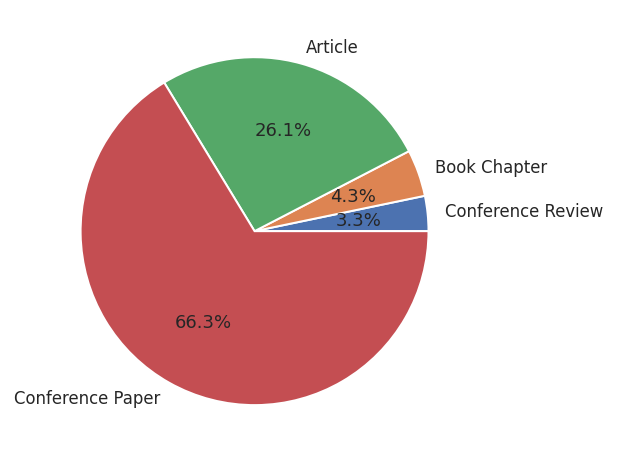

In [ ]:
document_show = plt.pie(document_counts, labels = document_labels, autopct='%1.1f%%')

##Keeping only the articles and conference paper  

In [ ]:
#Keeping only Articles and Reviews
#Making a list containing the two selected types
documents = ["Article", "Conference Paper"]
#Only keeping  the cells that have the document type contained in the list
df = df[df["Document Type"].isin(documents)]

##Merge index keywords and authors keywords

In [ ]:
#See missing in Author Keywords
df['Author Keywords'].isnull().sum()

6

In [ ]:
#See missing in Index Keywords
df['Index Keywords'].isnull().sum()

13

In [ ]:
#Fill in the missing places 
df["Author Keywords"].fillna(df["Index Keywords"], inplace = True)

##Replace missing values and drop unnecessary columns

In [ ]:
#The columns which are not needed for further analysis are deleted.
df = df.drop(['EID', 'Source', 'Open Access', 'Publication Stage', 'Document Type',
       'Abbreviated Source Title', 'CODEN',
       'ISSN', 'Correspondence Address', 'Funding Text 1',
       'Funding Details', 'Index Keywords', 
       'Authors with affiliations', 'Link', 'DOI', 
       'Page end', 'Page start', 'Issue', 'Volume', 'Source title', 
       'Author(s) ID', 'ISBN', 'Conference code',
       'Conference date', 'Conference name', 'Sponsors',
       'Editors', 'Art. No.', 'Page count', 'Conference location', 'PubMed ID',
       'Chemicals/CAS', 'num-Male', 'num-Female',
       'num-Unknown'], axis=1)

In [ ]:
#Detect missing values
#Some columns have many missing values - luckily, many of them are not useful for this analysis
df.isna().sum()

Language of Original Document     0
Publisher                         7
References                        0
Author Keywords                   0
Abstract                          0
Affiliations                      0
Year                              0
Title                             0
Authors                           0
Cited by                         36
num-Authors                       0
dtype: int64

In [ ]:
#The missing value in citation may not be a mistake but the information that the
#document has not been cited yet, therefore it is not a good idea to drop it
#We filled the missing places with 0 since 0 people cited those articles
df["Cited by"].fillna(0, inplace = True)

In [ ]:
#Dropping the missing values
df.dropna(inplace = True)

In [ ]:
#Checking for missing values
#There is none!
df.isna().sum()

Language of Original Document    0
Publisher                        0
References                       0
Author Keywords                  0
Abstract                         0
Affiliations                     0
Year                             0
Title                            0
Authors                          0
Cited by                         0
num-Authors                      0
dtype: int64

## Filter the 'Abstrct' Column

In [ ]:
df.Abstract

0     This paper experiments with machine learning a...
1     Artificial Neural Network (ANN) is a promising...
2     This paper employs a number of machine learnin...
3     The stock market is becoming a highly anticipa...
4     Machine learning has been extensively studied ...
                            ...                        
87    To predict the future stock price is not a sli...
88    This project is part of developing software to...
90    Stock market prediction has grown to be an int...
91    Nowadays, the stock price prediction has been ...
92    We provide evidence of the usefulness of explo...
Name: Abstract, Length: 78, dtype: object

In [ ]:
#Show entries with "No abstract available"
#There appears to be missing values within the abstract column
df[df['Abstract'] == '[No abstract available]']

Empty DataFrame
Columns: [Language of Original Document, Publisher, References, Author Keywords, Abstract, Affiliations, Year, Title, Authors, Cited by, num-Authors]
Index: []

## Extract the country

In [ ]:
#Inspect the column containing the country names for the universities where the researchers worked
df['Affiliations']

0     Computer Science Department, Binus Graduate Pr...
1     Graduate School of Computer Science and Engine...
2     North South University, Plot 15, Block B, Bash...
3     Global Academy of Technology, Bengaluru, Karna...
4     Department of Economics and Management, Jiangx...
                            ...                        
87    Amity University Uttar Pradesh, Noida, India; ...
88    Electrical Engineering Department, Petra Chris...
90    Computer Science Laboratory of Mohammedia, Fac...
91    Department of Computer Science, Faculty of Sci...
92    Departamento de Computación, Facultad de Cienc...
Name: Affiliations, Length: 78, dtype: object

In [ ]:
#Finding all the countries within the Affiliation column
#Loading the Spacy model for English
nlp = spacy.load('en_core_web_sm')
#Creating a matcher instance
matcher = PhraseMatcher(nlp.vocab)
#Creating a new dataframe column containing all the geographic locations from the Affiliation column
df["country"] = df["Affiliations"].map(lambda x: [ent.text for ent in list(nlp(str(x)).ents) if ent.label_ == 'GPE'])

In [ ]:
#Using counter on the country column to find the most reocurring locations
Counter(itertools.chain(*df["country"])).most_common(10)

[('India', 46),
 ('China', 19),
 ('United States', 16),
 ('Beijing', 11),
 ('Indonesia', 7),
 ('South Korea', 6),
 ('Seoul', 5),
 ('Pakistan', 4),
 ('Australia', 4),
 ('Karnataka', 3)]

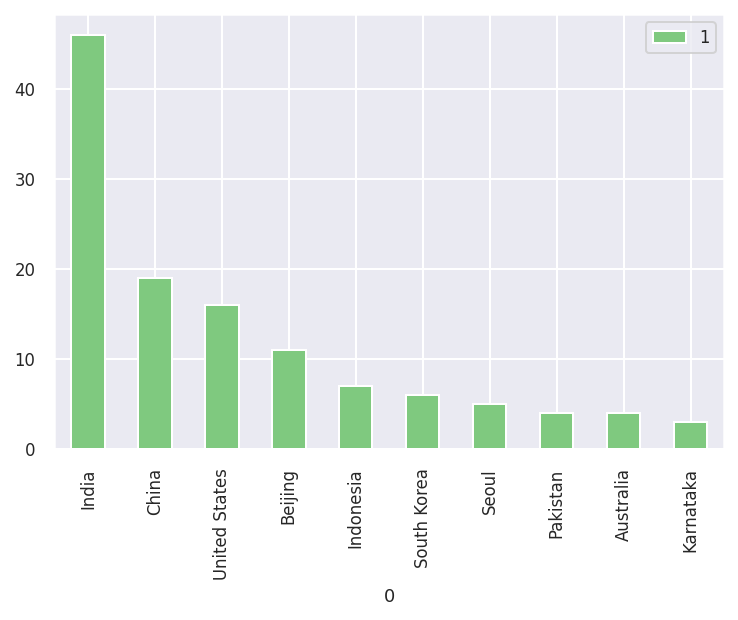

In [ ]:
#Creating a dataframe from the counter data for the visualisation
common_countries = pd.DataFrame(Counter(itertools.chain(*df["country"])).most_common(10)).set_index(0)
#Changing the color
common_countries.plot.bar(colormap = "Accent")

##Finishing touch

In [ ]:
#Lower capital letters  and reset index
df.reset_index(inplace=True, drop = True)
df.columns = [x.lower() for x in df.columns]

In [ ]:
#Rename the columns
df.rename(columns={"author keywords":"keywords","language of original document":"language","cited by":"cited"}, inplace=True)

In [ ]:
#Inspecting the cleaned up dataframe with .info()
#78 entries, majority of them non-numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   language      78 non-null     object 
 1   publisher     78 non-null     object 
 2   references    78 non-null     object 
 3   keywords      78 non-null     object 
 4   abstract      78 non-null     object 
 5   affiliations  78 non-null     object 
 6   year          78 non-null     float64
 7   title         78 non-null     object 
 8   authors       78 non-null     object 
 9   cited         78 non-null     float64
 10  num-authors   78 non-null     int64  
 11  country       78 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 7.4+ KB


In [ ]:
#Inspecting the cleaned up dataframe with .head()
#Everything appears to be good
df.head()

language  ...                                            country
0  [English]  ...                               [Jakarta, Indonesia]
1  [English]  ...                             [Aizuwakamatsu, Japan]
2  [English]  ...                                                 []
3  [English]  ...  [Bengaluru, Karnataka, India, Bengaluru, Karna...
4  [English]  ...  [Nanchang, China, Beijing, China, Beijing, China]

[5 rows x 12 columns]

#Statistical analysis/Introduction to the dataset


## Chart for the publisher

In [ ]:
#Count number of values in column
publisher = df.publisher.value_counts()
#Display the top 10 publishers
#Some names we all definitely know
publisher.head(10)

Institute of Electrical and Electronics Engineers Inc.         26
Springer                                                        7
Springer Verlag                                                 6
Association for Computing Machinery                             5
Blue Eyes Intelligence Engineering and Sciences Publication     3
Springer Science and Business Media Deutschland GmbH            3
IEEE Computer Society                                           3
World Academy of Research in Science and Engineering            3
Science and Engineering Research Support Society                2
Institute of Physics Publishing                                 2
Name: publisher, dtype: int64

In [ ]:
y = df["publisher"].value_counts()

In [ ]:
trace = go.Bar(
            x=df['publisher'],
            y=df["publisher"].value_counts().iloc[:10])

data = [trace]

layout = go.Layout(
    yaxis=dict(
        title='10 most popular publisher',
    )
)

fig = go.Figure(data=data, layout=layout)

In [ ]:
fig

## Inspecting the language distribution

In [ ]:
#Inspecting the distribution of the languages as numeric values
#Majority of the languages only have one publication
#Chinese is the exception with three articles
pd.DataFrame(df["language"].value_counts())

language
[English]        78

##Chart for Years 

In [ ]:
#Checking number of values in column
#2020 seems to have vastly more publications
year = df.year.value_counts()
year

2019.0    23
2018.0    13
2020.0    13
2017.0    12
2021.0     6
2016.0     6
2014.0     3
2015.0     2
Name: year, dtype: int64

In [ ]:
growth = pandas.DataFrame(RC.timeSeries('year', outputFile = 'lit-review.csv'))[:8]
growth

entry  count  year
0   2021      7  2021
1   2020     16  2020
2   2019     26  2019
3   2018     13  2018
4   2017     12  2017
5   2016      6  2016
6   2015      2  2015
7   2014      3  2014

In [ ]:
trace = go.Scatter(
    x = growth['year'],
    y = growth['count'],
    mode = 'lines+markers',
    name = 'lines+markers'
)

data = [trace]

layout = go.Layout(
    yaxis=dict(
        title='Number of Publications',
    ),
    xaxis=dict(
        title='Year',
    )
)

fig = go.Figure(data=data, layout=layout)

In [ ]:
fig

## Combination with the year and place

In [ ]:
#Check the years how many articles we have
#Seems to increase from 2015
df["year"].value_counts()

2019.0    23
2018.0    13
2020.0    13
2017.0    12
2021.0     6
2016.0     6
2014.0     3
2015.0     2
Name: year, dtype: int64

In [ ]:
df['country']= df['country'].replace(['Beijing'], 'China')

In [ ]:
asd = Counter(itertools.chain(*df["country"])).most_common(10)

In [ ]:
asd

[('India', 46),
 ('China', 19),
 ('United States', 16),
 ('Beijing', 11),
 ('Indonesia', 7),
 ('South Korea', 6),
 ('Seoul', 5),
 ('Pakistan', 4),
 ('Australia', 4),
 ('Karnataka', 3)]

In [ ]:
asd

[('India', 46),
 ('China', 19),
 ('United States', 16),
 ('Beijing', 11),
 ('Indonesia', 7),
 ('South Korea', 6),
 ('Seoul', 5),
 ('Pakistan', 4),
 ('Australia', 4),
 ('Karnataka', 3)]

In [ ]:
res_list = []
for i in range(0, len(asd)):
  res_list.append(asd[1]+asd[3])

In [ ]:
print(res_list)

[('China', 19, 'Beijing', 11), ('China', 19, 'Beijing', 11), ('China', 19, 'Beijing', 11), ('China', 19, 'Beijing', 11), ('China', 19, 'Beijing', 11), ('China', 19, 'Beijing', 11), ('China', 19, 'Beijing', 11), ('China', 19, 'Beijing', 11), ('China', 19, 'Beijing', 11), ('China', 19, 'Beijing', 11)]


In [ ]:
res_list = [asd[1] + asd[3] for i in range(len(asd))]

In [ ]:
res_list = [asd[1] + asd[3]]

In [ ]:
res_list

[('China', 19, 'Beijing', 11)]

In [ ]:
china = res_list[0]

In [ ]:
china

('China', 19, 'Beijing', 11)

In [ ]:
china1 = list(china)

In [ ]:
china1

['China', 19, 'Beijing', 11]

In [ ]:
china2= china1[1]+china1[3]

In [ ]:
chinaaa=[]
chinaaa.append("China")
chinaaa.append(china2)

In [ ]:
chinaaa

['China', 30]

In [ ]:
asd1 =list(asd)

In [ ]:
asd1

[('India', 46),
 ('China', 19),
 ('United States', 16),
 ('Beijing', 11),
 ('Indonesia', 7),
 ('South Korea', 6),
 ('Seoul', 5),
 ('Pakistan', 4),
 ('Australia', 4),
 ('Karnataka', 3)]

In [ ]:
asd1.pop(1)
asd1.pop(3)

('Indonesia', 7)

In [ ]:
asd1

[('India', 46),
 ('United States', 16),
 ('Beijing', 11),
 ('South Korea', 6),
 ('Seoul', 5),
 ('Pakistan', 4),
 ('Australia', 4),
 ('Karnataka', 3)]

In [ ]:
asd1.append(chinaaa)

In [ ]:
asd1

[('India', 46),
 ('United States', 16),
 ('Beijing', 11),
 ('South Korea', 6),
 ('Seoul', 5),
 ('Pakistan', 4),
 ('Australia', 4),
 ('Karnataka', 3),
 ['China', 30]]

In [ ]:
asd = asd1

In [ ]:
#As can be recalled from the previous part, the number of publications seemed to increase from 2015
#Creating an empty dictionary containing dataframes
dict_of_df = {}
#Iterating over the years 2015-2020
for i in range(2015,2021):
#Creating a dataframe with the 7 most common countries for every year
    dict_of_df["df_{}".format(i)] = pd.DataFrame(data = (Counter(itertools.chain(*df[df["year"]==i]["country"])).most_common(7))).set_index(0).rename(columns={1:i})

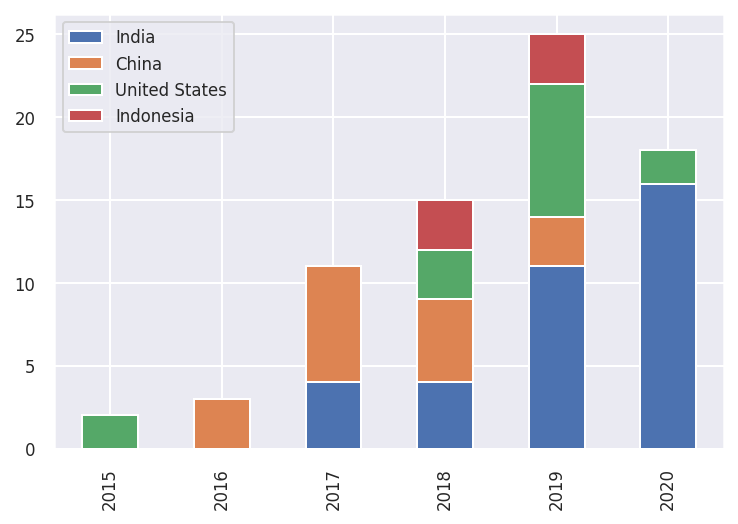

In [ ]:
#Creating a new dataframe through concatinating the previously created dataframes based on the index and transposing it
plotdata = pd.concat([dict_of_df["df_2015"], dict_of_df["df_2016"], dict_of_df["df_2017"], dict_of_df["df_2018"], dict_of_df["df_2019"], dict_of_df["df_2020"]], axis=1).T
#Making a stacked bar chart for the countries of interest
plotdata[["India", "China", "United States", "Indonesia"]].plot(kind="bar", stacked=True)


##Exploring the number of citations

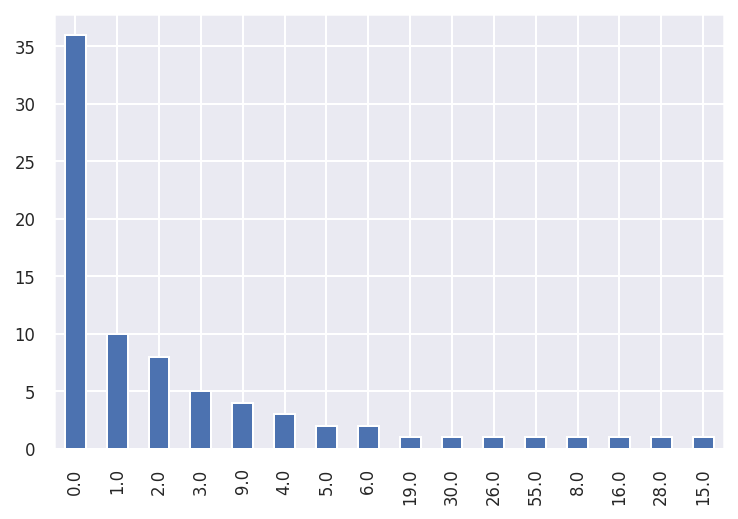

In [ ]:
#Visualization of the number of citations that the articles get
#The vast majority has 0 citations
df["cited"].value_counts().plot.bar()

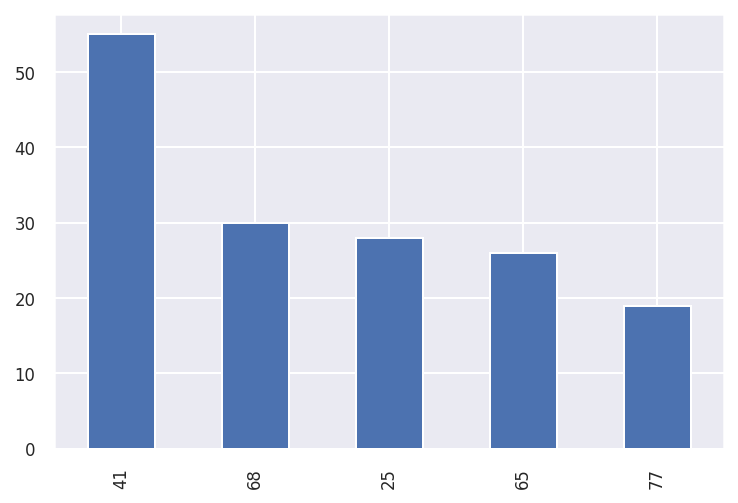

In [ ]:
#Finding the most cited articles
#Number 250 has a lot of citations
df["cited"].sort_values(ascending = False).head(5).plot.bar()

In [ ]:
#Taking a closer look at the paper
df.loc[df["cited"].sort_values(ascending = False).head(1).index]

language  ...                            country
41  [English]  ...  [Dhanbad, India, Varanasi, India]

[1 rows x 12 columns]

In [ ]:
top_15 = df.sort_values(['cited'], ascending = False)[:15]
top_15.head()

language  ...                            country
41  [English]  ...  [Dhanbad, India, Varanasi, India]
68  [English]  ...                           [Poland]
25  [English]  ...                           [Taiwan]
65  [English]  ...      [Karachi, Pakistan, Malaysia]
77  [English]  ...   [Argentina, Técnicas, Argentina]

[5 rows x 12 columns]

In [ ]:
trace = go.Bar(
            x=top_15['title'],
            y=top_15['cited']
    )

data = [trace]

layout = go.Layout(
    yaxis=dict(
        title='Times Cited',
    )
)

fig = go.Figure(data=data, layout=layout)

In [ ]:
fig

In [ ]:
top_15['short_title'] = top_15['title'].str[:20]
top_15[['title', 'short_title', 'cited']].head()

title  ... cited
41               Stock prediction using deep learning  ...  55.0
68  Sentiment analysis of Twitter data within big ...  ...  30.0
25  Deep learning for financial sentiment analysis...  ...  28.0
65  Stock market prediction using machine learning...  ...  26.0
77  Assessing the usefulness of online message boa...  ...  19.0

[5 rows x 3 columns]

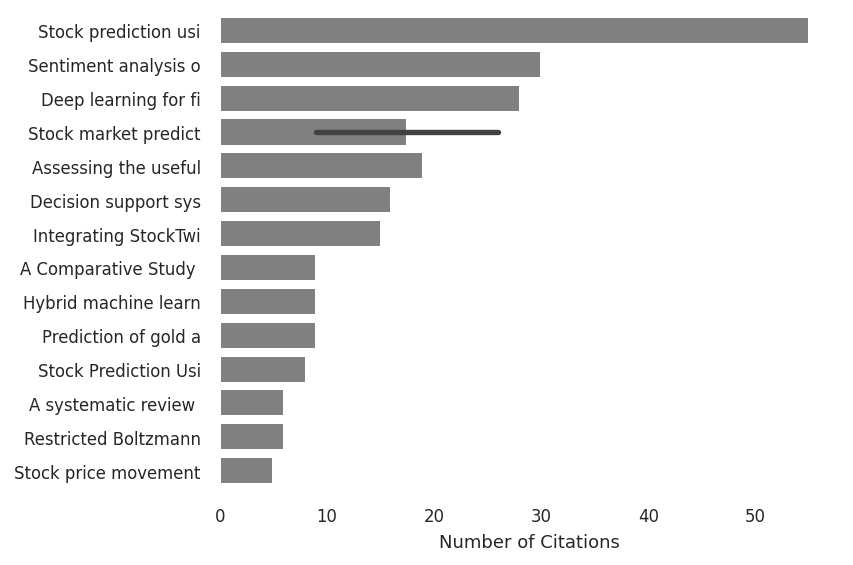

In [ ]:
with sns.axes_style("white"):
    horizontal_bar = sns.barplot(data = top_15, x = 'cited', y = 'short_title', color = 'gray')
    horizontal_bar.set(xlabel='Number of Citations', ylabel='')
    sns.despine(left = True, right = True, bottom = True, top = True)
    plt.tight_layout()

##Exploring the authors

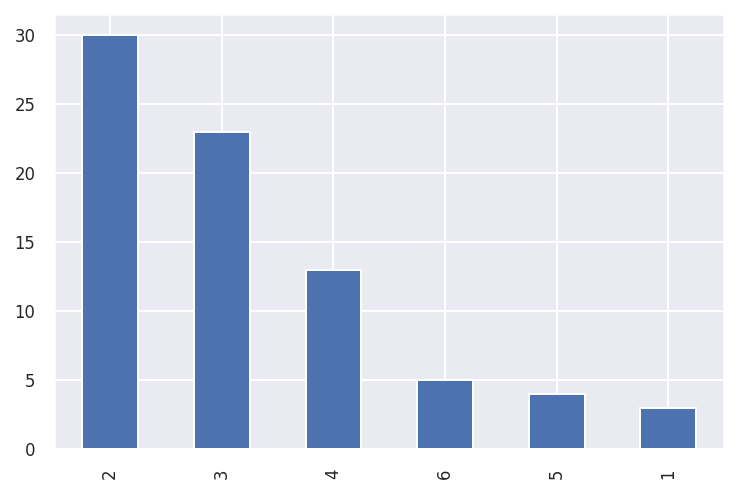

In [ ]:
#Number of authors working together on a given paper
df["num-authors"].value_counts().plot.bar()

In [ ]:
#Using counter to find the 10 authors who wrote the most papers
Counter(itertools.chain(*df["authors"])).most_common(10)

[('Zhang J.', 3),
 ('Rikumahu B.', 2),
 ('Kumari S.', 2),
 ('Bogle S.A.', 2),
 ('Potter W.D.', 2),
 ('Sebastian W.', 1),
 ('Isa S.M.', 1),
 ('Tsai Y.', 1),
 ('Zhao Q.', 1),
 ('Hasan S.S.', 1)]

##Find the most common key words

In [ ]:
#Using counter to find the most common keywords
Counter(itertools.chain(*df["keywords"])).most_common(10)

[('Stock prediction', 18),
 ('Machine learning', 14),
 ('Machine Learning', 12),
 ('Deep learning', 9),
 ('Sentiment analysis', 7),
 ('Forecasting', 7),
 ('Stock Prediction', 6),
 ('Stock market', 5),
 ('Stock price prediction', 5),
 ('Stock predictions', 5)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

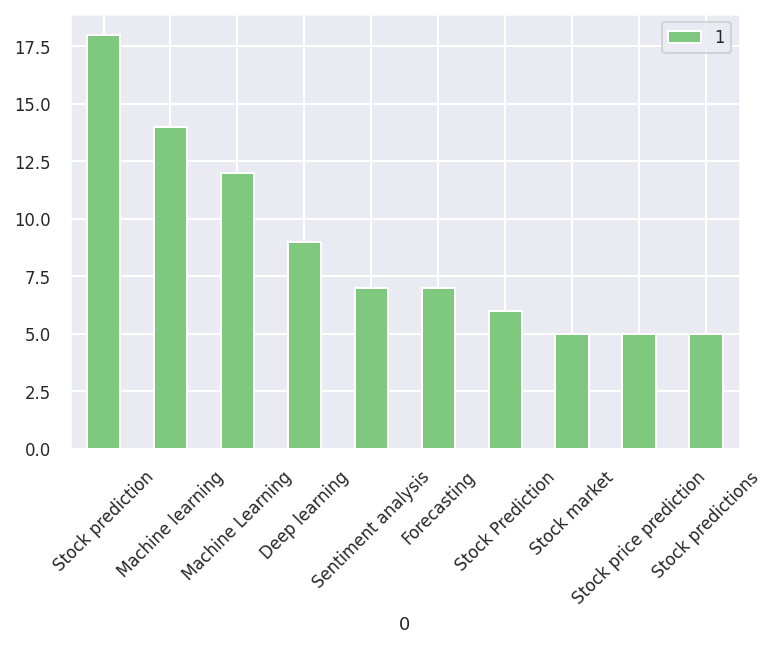

In [ ]:
#Visualizing the most common words as a bar plot
common_words = pd.DataFrame(Counter(itertools.chain(*df["keywords"])).most_common(10)).set_index(0)
common_words.plot.bar(colormap = "Accent")
plt.xticks(rotation=45)

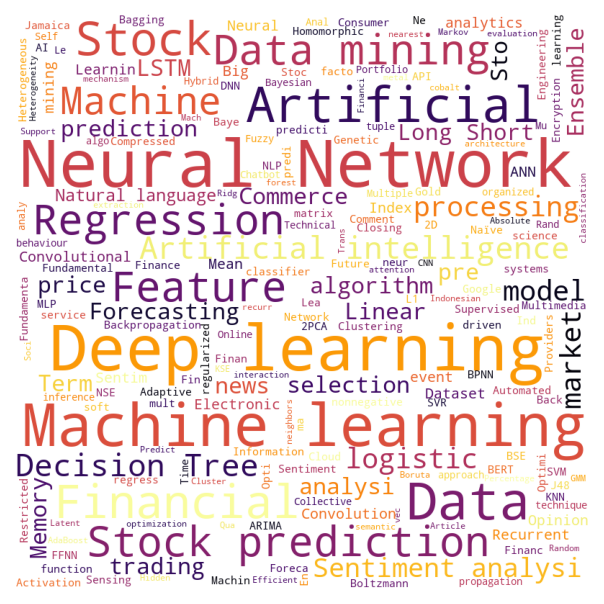

In [ ]:
#Visualizing the keyword column as a word map
text = df["keywords"].to_string()

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, colormap = "inferno").generate(text)

plt.figure(facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#Network analysis

In [ ]:
#Creating a network object using the metaknowledge functionality
coauth_net = RC.networkCoAuthor()
#Printing the statistics for the network
print(mk.graphStats(coauth_net))

Nodes: 259
Edges: 334
Isolates: 4
Self loops: 0
Density: 0.00999671
Transitivity: 0.897912


From this 
giant_coauth = max(nx.connected_component_subgraphs(coauth_net), key=len)
to this need to be changed to work 
connected_component_subgraphs = (graph.subgraph(c) for c in nx.connected_components(coauth_net))
largest_subgraph = max(connected_component_subgraphs, key=len)

In [ ]:
mk.dropEdges(coauth_net, minWeight=2, dropSelfLoops=True)

In [ ]:
deg = nx.degree_centrality(coauth_net)
eig = nx.eigenvector_centrality(coauth_net)
bet = nx.betweenness_centrality(coauth_net)
clo = nx.closeness_centrality(coauth_net)

In [ ]:
cent_df = pandas.DataFrame.from_dict([deg, eig, bet, clo])
cent_df = pandas.DataFrame.transpose(cent_df)
cent_df.columns = ['degree', 'eigenvector', 'betweenness', 'closeness']
cent_df.sort_values('degree', ascending = False)[:10]

degree   eigenvector  betweenness  closeness
Bogle S.A.    0.003876  5.000000e-01          0.0   0.003876
Potter W.D.   0.003876  5.000000e-01          0.0   0.003876
Anwer M.      0.003876  5.000000e-01          0.0   0.003876
Banik S.      0.003876  5.000000e-01          0.0   0.003876
Sebastian W.  0.000000  9.536743e-07          0.0   0.000000
Azam M.A.     0.000000  9.536743e-07          0.0   0.000000
Liu W.        0.000000  9.536743e-07          0.0   0.000000
Wan T.        0.000000  9.536743e-07          0.0   0.000000
Zeng Q.       0.000000  9.536743e-07          0.0   0.000000
Yang H.       0.000000  9.536743e-07          0.0   0.000000

In [ ]:
#Finding the degree centrality
pd.DataFrame(nx.degree_centrality(coauth_net), index = [0]).T.sort_values(by=0, ascending = False).head(10)

0
Bogle S.A.    0.003876
Potter W.D.   0.003876
Anwer M.      0.003876
Banik S.      0.003876
Sebastian W.  0.000000
Azam M.A.     0.000000
Liu W.        0.000000
Wan T.        0.000000
Zeng Q.       0.000000
Yang H.       0.000000

In [ ]:
#Finding the eigenvector centrality
pd.DataFrame(nx.eigenvector_centrality_numpy(coauth_net), index = [0]).T.sort_values(by=0, ascending = False).head(10)

0
Anwer M.      6.681821e-01
Banik S.      6.681821e-01
Potter W.D.   2.313713e-01
Bogle S.A.    2.313713e-01
Dabbiru M.    1.556013e-17
Jiao Y.       1.502497e-17
Yeze Z.       1.428886e-17
Kholief M.H.  1.270635e-17
Park J.       1.261549e-17
Batra R.      1.260459e-17

In [ ]:
#Finding the betweenness centrality
pd.DataFrame(nx.betweenness_centrality(coauth_net), index = [0]).T.sort_values(by=0, ascending = False).head(10)

0
Sebastian W.       0.0
Unnikrishnan V.S.  0.0
Mustafi J.         0.0
Zhao H.            0.0
Qin Z.             0.0
Liu W.             0.0
Wan T.             0.0
Zeng Q.            0.0
Yang H.            0.0
Carrio A.          0.0

In [ ]:
#Creating the dictionary of the node centrality
node_degree_dict=nx.degree(coauth_net)
#Only choosing objects with higher degree centrality (rendering everything would be very computationally expensive)
selected_network=nx.subgraph(coauth_net,[x for x in coauth_net.nodes() if node_degree_dict[x]>5])
#Creating a community partition
partition = community_louvain.best_partition(selected_network)

In [ ]:
node_degree_dict

DegreeView({'Sebastian W.': 0, 'Isa S.M.': 0, 'Tsai Y.': 0, 'Zhao Q.': 0, 'Hasan S.S.': 0, 'Rahman R.': 0, 'Mannan N.': 0, 'Khan H.': 0, 'Moni J.N.': 0, 'Rahman R.M.': 0, 'Tripathi B.C.R.': 0, 'Kumar T.S.': 0, 'Prasad R.K.': 0, 'Singh V.P.': 0, 'Xu M.': 0, 'Lan Y.': 0, 'Jiang D.': 0, 'Jain A.K.': 0, 'Prasad Rao P.V.R.D.': 0, 'Venkatesh Sharma K.': 0, 'Agrawal M.': 0, 'Khan A.U.': 0, 'Shukla P.K.': 0, 'Solin M.M.': 0, 'Alamsyah A.': 0, 'Rikumahu B.': 0, 'Saputra M.A.A.': 0, '[No author name available]': 0, 'Birbeck E.': 0, 'Cliff D.': 0, 'Kumari S.': 0, 'Chaudhari K.': 0, 'Deshmukh R.': 0, 'Naik R.': 0, 'Deshmukh A.': 0, 'Bogle S.A.': 1, 'Potter W.D.': 1, 'Deepika N.': 0, 'Bhat M.N.': 0, 'Rana M.': 0, 'Uddin Md.M.': 0, 'Hoque Md.M.': 0, 'Patalay S.': 0, 'Bandlamudi M.R.': 0, 'Taha A.K.': 0, 'Kholief M.H.': 0, 'AbdelMoez W.': 0, 'Guo J.': 0, 'Tuckfield B.': 0, 'Liang Q.': 0, 'Rong W.': 0, 'Zhang J.': 0, 'Liu J.': 0, 'Xiong Z.': 0, 'Gaurav P.': 0, 'Singhal A.': 0, 'Mani A.': 0, 'Sahana T.

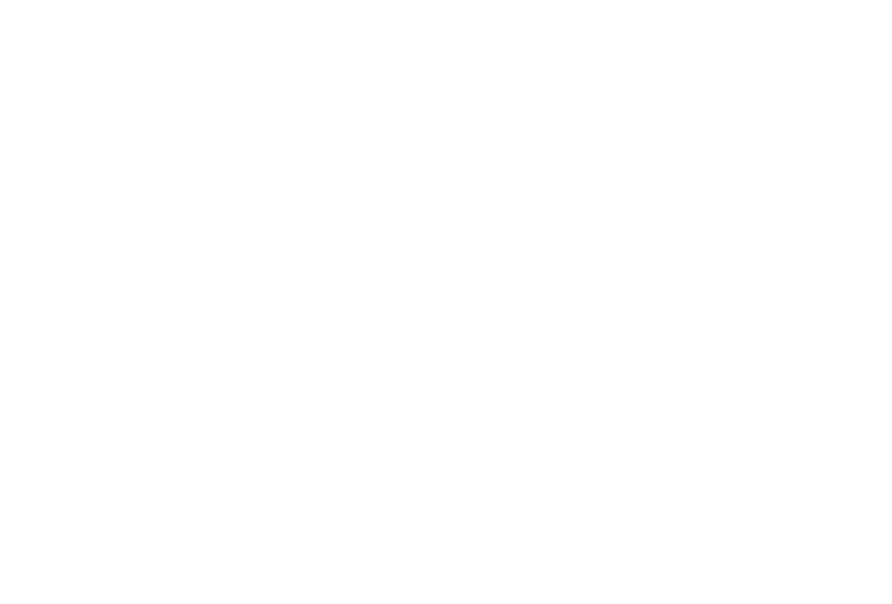

In [ ]:
#Visualizing the network
nx.draw_kamada_kawai(selected_network, node_color=list(partition.values()), node_size=[v * 0.2 for v in dict(selected_network.degree()).values()])

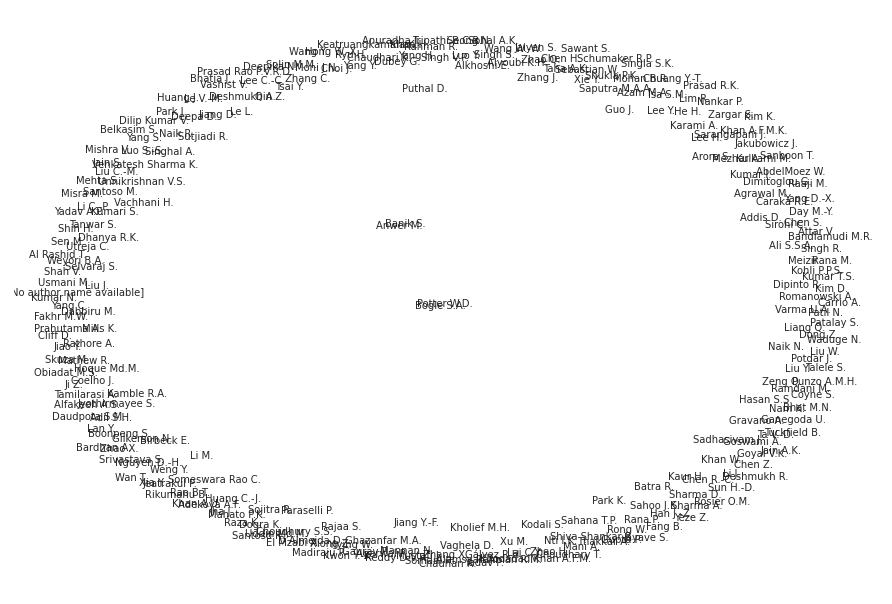

In [ ]:
eig = nx.eigenvector_centrality(coauth_net)
size = [2000 * eig[node] for node in coauth_net]

nx.draw_spring(coauth_net, node_size = size, with_labels = True, font_size = 5, 
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)

##Citation network

In [ ]:
#Creating the network using the metaknowledge functionality
cit_net = RC.networkCitation()
#Printing the statistics for the network
print(mk.graphStats(cit_net))

Nodes: 2112
Edges: 2138
Isolates: 0
Self loops: 0
Density: 0.000479541
Transitivity: 0


In [ ]:
#Checking the reciprocity as well, as this network is direected
nx.reciprocity(cit_net)

0.0

In [ ]:
#Checking the degree centrality
pd.DataFrame(nx.degree_centrality(cit_net), index = [0]).T.sort_values(by=0, ascending = False).head(10)

0
CHOUDHARY T., 2020, ARTIFICIAL INTELLIGENCE REVIEW  0.083847
NTI I.K., 2020, ARTIFICIAL INTELLIGENCE REVIEW      0.082425
KHAN W., 2020, JOURNAL OF AMBIENT INTELLIGENCE ...  0.041686
HUANG J., 2019, PROCEEDINGS - 2019 IEEE INTERNA...  0.027475
DONG Z., 2019, PLOS ONE                             0.024633
SEONG N., 2021, EXPERT SYSTEMS WITH APPLICATIONS    0.024159
PARK K., 2013, ENGINEERING APPLICATIONS OF ARTI...  0.020369
LIANG Q., 2017, PROCEEDINGS OF THE INTERNATIONA...  0.019896
PATALAY S., 2020, ASIA PACIFIC JOURNAL OF INFOR...  0.018948
VACHHANI H., 2020, LECTURE NOTES ON DATA ENGINE...  0.018001

In [ ]:
#Checking the eigenvector centrality
pd.DataFrame(nx.eigenvector_centrality_numpy(cit_net), index = [0]).T.sort_values(by=0, ascending = False).head(10)

0
KIM, K., 2003, NEUROCOMPUTING                       0.076295
HAGENAU, M., 2013, DECISION SUPPORT SYSTEMS         0.057564
FISCHER, T., 2018, EUROPEAN JOURNAL OF OPERATIO...  0.054749
LI, Q., 2014, INFORMATION SCIENCES                  0.051906
GOODFELLOW, I., 2014, ADVANCES IN NEURAL INFORM...  0.049646
KRIZHEVSKY, A., 2012, ADVANCES IN NEURAL INFORM...  0.049646
CORTES, C., 1995, MACHINE LEARNING                  0.046141
BISOI, R., 2014, APPLIED SOFT COMPUTING             0.041279
DASH, R., 2016, J. FINANC. DATA SCI.                0.037907
SHADMAN, A.I., 2017, ICTA 2016. AISC                0.036845

In [ ]:
#Creating the dictionary of the node centrality
node_degree_dict_1=nx.degree(cit_net)
#Only choosing the nodes with higher centrality
selected_network_1=nx.subgraph(cit_net,[x for x in cit_net.nodes() if node_degree_dict_1[x]>5])

In [ ]:
# setting up a layout
layout = nx.layout.kamada_kawai_layout(selected_network_1)
# creating a plot
plot = hv.Graph.from_networkx(selected_network_1, layout)
bundled = bundle_graph(plot)
# additional settings
bundled.opts(
    opts.Graph(edge_color='weight', cmap='magma',
                 node_color = "red", node_size = 10))
# showing the plot
show(hv.render(bundled))
#This method of visualization was not used for the previous network, as only choosing the more central nodes didn't provide a proper visualization
#And rendering this visualization for all the observations was taking close to an hour

#Analysis of the abstract/topic modeling

##Data preparation for NLP

In [ ]:
#Creating a new, smaller dataframe using only the needed columns
df1 = df.loc[:,["abstract", "year"]]
#Resetting the index
df1.reset_index(inplace = True, drop = True)
#Exploring the dataframe
df1.head()

abstract    year
0  This paper experiments with machine learning a...  2020.0
1  Artificial Neural Network (ANN) is a promising...  2019.0
2  This paper employs a number of machine learnin...  2017.0
3  The stock market is becoming a highly anticipa...  2021.0
4  Machine learning has been extensively studied ...  2016.0

In [ ]:
#Adding a new column for the tokenized abstract
#So far placing the abstract with lowered capital leters in the column
df1["tokenized"] = df1["abstract"].map(lambda x: x.lower())
df1.head()

abstract  ...                                          tokenized
0  This paper experiments with machine learning a...  ...  this paper experiments with machine learning a...
1  Artificial Neural Network (ANN) is a promising...  ...  artificial neural network (ann) is a promising...
2  This paper employs a number of machine learnin...  ...  this paper employs a number of machine learnin...
3  The stock market is becoming a highly anticipa...  ...  the stock market is becoming a highly anticipa...
4  Machine learning has been extensively studied ...  ...  machine learning has been extensively studied ...

[5 rows x 3 columns]

In [ ]:
#Tokenizing the abstract
df1["tokenized"] = df1["tokenized"].map(lambda x: word_tokenize(x))
df1.head()

abstract  ...                                          tokenized
0  This paper experiments with machine learning a...  ...  [this, paper, experiments, with, machine, lear...
1  Artificial Neural Network (ANN) is a promising...  ...  [artificial, neural, network, (, ann, ), is, a...
2  This paper employs a number of machine learnin...  ...  [this, paper, employs, a, number, of, machine,...
3  The stock market is becoming a highly anticipa...  ...  [the, stock, market, is, becoming, a, highly, ...
4  Machine learning has been extensively studied ...  ...  [machine, learning, has, been, extensively, st...

[5 rows x 3 columns]

In [ ]:
#Creating a stoplist containing a list of english stopwords from nltk, a list of punctuation and the copyright sign
c = '©'
stoplist = set(stopwords.words('english') + list(punctuation) + list(c))
#Only keeping the words that are not in the stoplist
df1["tokenized"] = df1["tokenized"].map(lambda x: [word for word in x if word not in stoplist])
df1.head()

abstract  ...                                          tokenized
0  This paper experiments with machine learning a...  ...  [paper, experiments, machine, learning, algori...
1  Artificial Neural Network (ANN) is a promising...  ...  [artificial, neural, network, ann, promising, ...
2  This paper employs a number of machine learnin...  ...  [paper, employs, number, machine, learning, al...
3  The stock market is becoming a highly anticipa...  ...  [stock, market, becoming, highly, anticipated,...
4  Machine learning has been extensively studied ...  ...  [machine, learning, extensively, studied, pote...

[5 rows x 3 columns]

In [ ]:
#Creating a lemmatizer instance
lemmatizer = WordNetLemmatizer()
#Applying the lemmatizer
df1["tokenized"] = df1["tokenized"].map(lambda x: [lemmatizer.lemmatize(word) for word in x])
df1.head()

abstract  ...                                          tokenized
0  This paper experiments with machine learning a...  ...  [paper, experiment, machine, learning, algorit...
1  Artificial Neural Network (ANN) is a promising...  ...  [artificial, neural, network, ann, promising, ...
2  This paper employs a number of machine learnin...  ...  [paper, employ, number, machine, learning, alg...
3  The stock market is becoming a highly anticipa...  ...  [stock, market, becoming, highly, anticipated,...
4  Machine learning has been extensively studied ...  ...  [machine, learning, extensively, studied, pote...

[5 rows x 3 columns]

##Count based methods

In [ ]:
#Creating the trigrams
df1["ngram"] = df1["tokenized"].map(lambda x: [ ' '.join(gram) for gram in ngrams(x,3)] )
#Finding the most common tri grams -they are not interesting, scientific stuff
Counter(itertools.chain(*df1["ngram"])).most_common(10)

[('machine learning algorithm', 26),
 ('machine learning technique', 18),
 ('support vector machine', 18),
 ('artificial neural network', 15),
 ('stock market prediction', 15),
 ('machine learning model', 14),
 ('predict stock price', 13),
 ('predict future stock', 11),
 ('stock price prediction', 10),
 ('future stock price', 9)]

In [ ]:
#Digrams are a bit more interesting
df1["ngram"] = df1["tokenized"].map(lambda x: [ ' '.join(gram) for gram in ngrams(x,2)] )
Counter(itertools.chain(*df1["ngram"])).most_common(10)

[('machine learning', 108),
 ('stock price', 100),
 ('stock market', 97),
 ('stock prediction', 55),
 ('neural network', 54),
 ('learning algorithm', 29),
 ('predict stock', 26),
 ('deep learning', 26),
 ('social medium', 25),
 ('support vector', 24)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

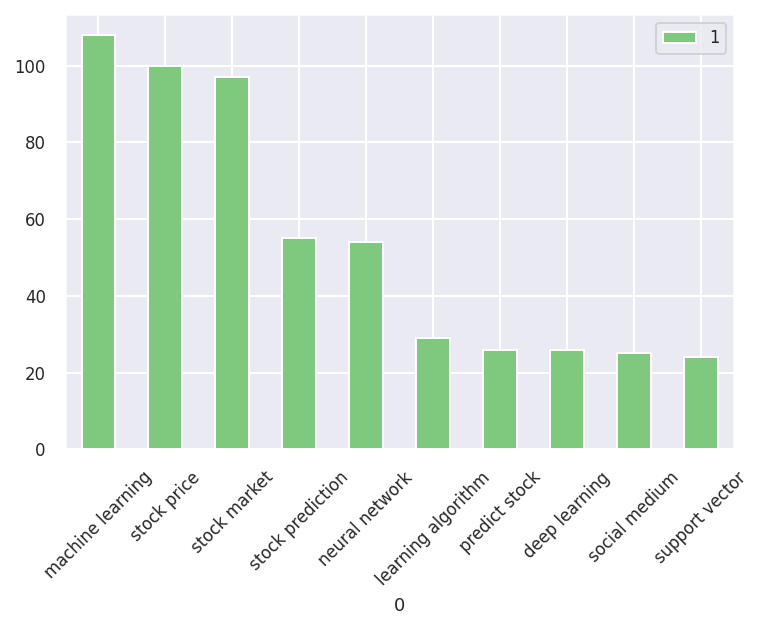

In [ ]:
#Creating a visualization for the digrams
common_digrams = pd.DataFrame(Counter(itertools.chain(*df1["ngram"])).most_common(10)).set_index(0)
common_digrams.plot.bar(colormap = "Accent")
plt.xticks(rotation=45)

In [ ]:
#Finding the 10 most common words
Counter(itertools.chain(*df1["tokenized"])).most_common(10)

[('stock', 382),
 ('prediction', 178),
 ('model', 171),
 ('price', 163),
 ('market', 157),
 ('learning', 156),
 ('data', 135),
 ('machine', 130),
 ('result', 76),
 ('analysis', 75)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

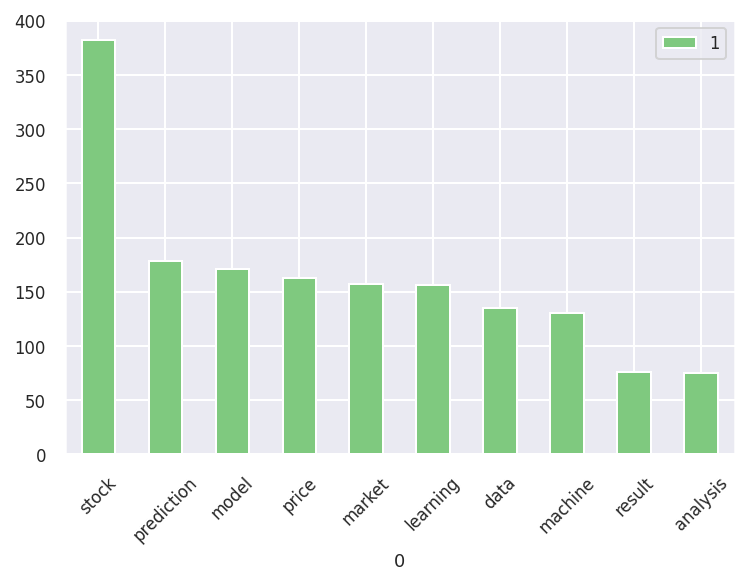

In [ ]:
#Visualizing the 10 most common words
common_tokenized = pd.DataFrame(Counter(itertools.chain(*df1["tokenized"])).most_common(10)).set_index(0)
common_tokenized.plot.bar(colormap = "Accent")
plt.xticks(rotation=45)

In [ ]:
#Creating two dataframes -one for before and one for during 2020
df_pre = df[df["year"] != 2020]
df_post = df[df["year"] == 2020]
text_pre = df_pre["abstract"].to_string()
text_post = df_post["abstract"].to_string()

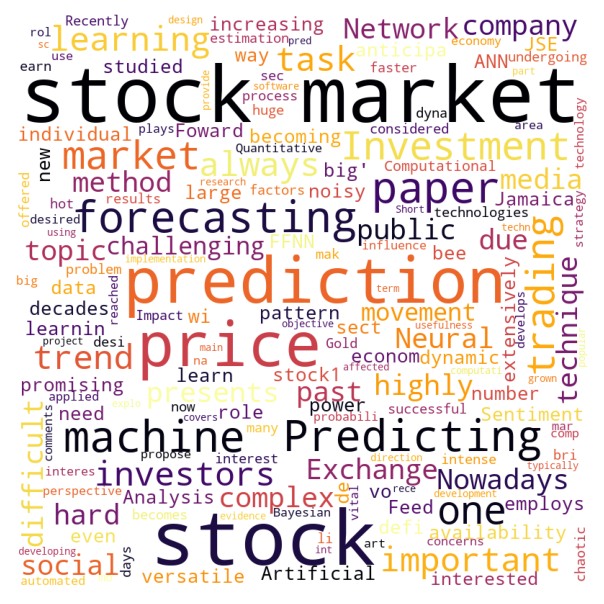

In [ ]:
#Creating a wordcloud for the abstract before 2020
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, colormap = "inferno").generate(text_pre)

plt.figure(facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

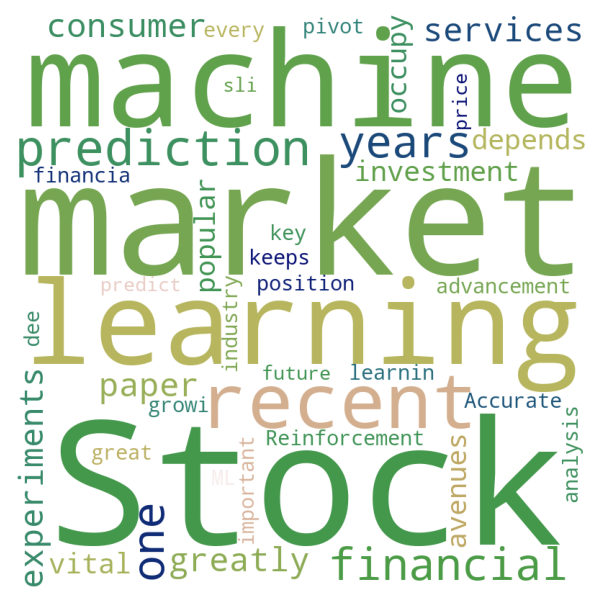

In [ ]:
#Creating a wordcloud for the abstract in 2020
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, colormap = "gist_earth").generate(text_post)

plt.figure(facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

##UML

In [ ]:
#Creating a dictionary from the tokenized abstract
dictionary= Dictionary(df1['tokenized'])
#Creating a corpus from the dictionary
corpus = [dictionary.doc2bow(doc) for doc in df1['tokenized']]
#Fitting tfidf
tfidf = TfidfModel(corpus)
#Applying tfidf
corpus_tfidf = tfidf[corpus]

In [ ]:
#Calculating a coherence score for the different number of topics
#Creating an empty set for coherence
coherence = []
#Creating a range
I = range(1,21)
#Iterating over the range to check the coherence for each number of topics
for i in I:
    lda = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda, texts=df1['tokenized'].tolist(), dictionary=dictionary, coherence='c_v')
    coherence.append(coherence_model_lda.get_coherence())

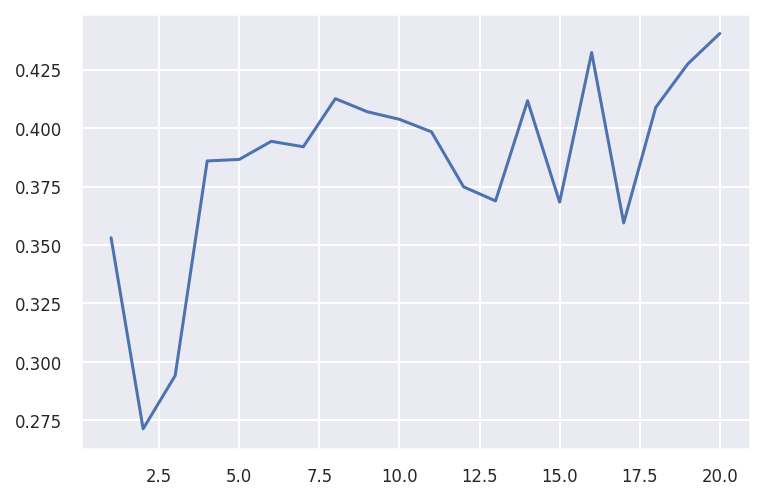

In [ ]:
#Visualizing the coherence plot
#12 is the number that gives a high coherence while not being overwhelmingly high
sns.lineplot(I, coherence)

In [ ]:
#Creating LDA model
lda = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8)

In [ ]:
#Printing the topics out
#They seem rather similar, it is difficult to understand the differences between them based on reading
lda.print_topics()

[(0,
  '0.002*"portfolio" + 0.002*"conversational" + 0.002*"selection" + 0.002*"social" + 0.002*"investigated" + 0.002*"medium" + 0.002*"rule" + 0.001*"oaa" + 0.001*"multi-binary" + 0.001*"news"'),
 (1,
  '0.002*"joint" + 0.002*"five" + 0.002*"indicator" + 0.002*"attribute" + 0.002*"mean" + 0.002*"rate" + 0.002*"performance" + 0.002*"parallel" + 0.002*"previous" + 0.002*"feature"'),
 (2,
  '0.002*"ann" + 0.002*"dhaka" + 0.002*"rbm" + 0.002*"several" + 0.002*"demonstrates" + 0.002*"algorithm" + 0.002*"rough" + 0.002*"compared" + 0.001*"exchange" + 0.001*"gaussian"'),
 (3,
  '0.002*"device" + 0.002*"listed" + 0.002*"make" + 0.002*"resource-constrained" + 0.002*"year" + 0.002*"convolutional" + 0.002*"size" + 0.002*"announcement" + 0.002*"value" + 0.002*"easier"'),
 (4,
  '0.002*"regression" + 0.002*"deep" + 0.002*"financial" + 0.002*"term" + 0.002*"trend" + 0.002*"technique" + 0.002*"trading" + 0.002*"series" + 0.002*"logistic" + 0.002*"technical"'),
 (5,
  '0.002*"dynabe" + 0.002*"markov

In [ ]:
#Creating a visualization
#That allows to see the differences between the topics a lot clearer
#The plot is interactive - hover over the topics to see which words are the most prominent within it
#Hover over the word to see which topic it's mostly used in
display = pyLDAvis.gensim.prepare(lda, corpus_tfidf, dictionary)
pyLDAvis.display(display)

In [ ]:
# defining a function that will add the dominant topic to each index value
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic', 'perc_contribution', 'topic_keywords']
        # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
#Adding the dominant topics to the dataframe
df2 = format_topics_sentences(lda, corpus_tfidf, df1["tokenized"])
df2.head()

dominant_topic  ...                                          tokenized
0             2.0  ...  [paper, experiment, machine, learning, algorit...
1             0.0  ...  [artificial, neural, network, ann, promising, ...
2             5.0  ...  [paper, employ, number, machine, learning, alg...
3             4.0  ...  [stock, market, becoming, highly, anticipated,...
4             3.0  ...  [machine, learning, extensively, studied, pote...

[5 rows x 4 columns]

In [ ]:
#Checking which topics are the most "popular"
df2["dominant_topic"].value_counts()

0.0    16
3.0    15
2.0    15
1.0    14
5.0    14
4.0     4
Name: dominant_topic, dtype: int64